# Preprocessing

In [41]:
import pandas as pd
import numpy as np

# Import and suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Visualiazation
from seaborn import countplot

# Generate dataset
Cars = {'Date': ['10.10.2018', '14.10.2018', '07.11.2018', '20.11.2018', '06.12.2018', '01.01.2019', '07.01.2019', '07.02.2019'],
        'Brand': ['Honda Civic', np.NaN, 'Toyota Corolla', 'Ford Focus',  np.NaN, 'Audi A4', np.NaN, 'Honda'],
        'Price1': [22000, 25000, 27000, np.NaN, 35000, 15000, 1000, 1500],
        'Price2': [23000, 21000, 25000, np.NaN, 35000, 11000, 1200, 1100],
        'Engine': ['150.0 horsepower', '100.0 horsepower', '250.0 horsepower', '100.5 horsepower', '50.0 horsepower', '40.0 horsepower', '50.5 horsepower', '45.0 horsepower'],
        'Color': ['red', 'blue', 'green', 'red', np.NaN, 'blue', 'red', 'yellow'],
        'Year': [2000, 2010, 2015, 2011, 2019, 2005, 1999, 1995],
        'Label': [1, 0, 0, 0, 0, 0, 1, 1]
        }

df = pd.DataFrame(Cars, columns= ['Date', 'Brand', 'Price1', 'Price2', 'Engine', 'Color', 'Year', 'Label'])
df

,Date,Brand,Price1,Price2,Engine,Color,Year,Label
0,10.10.2018,Honda Civic,22000.0,23000.0,150.0 horsepower,red,2000,1
1,14.10.2018,NaN,25000.0,21000.0,100.0 horsepower,blue,2010,0
2,07.11.2018,Toyota Corolla,27000.0,25000.0,250.0 horsepower,green,2015,0
3,20.11.2018,Ford Focus,NaN,NaN,100.5 horsepower,red,2011,0
4,06.12.2018,NaN,35000.0,35000.0,50.0 horsepower,NaN,2019,0
5,01.01.2019,Audi A4,15000.0,11000.0,40.0 horsepower,blue,2005,0
6,07.01.2019,NaN,1000.0,1200.0,50.5 horsepower,red,1999,1
7,07.02.2019,Honda,1500.0,1100.0,45.0 horsepower,yellow,1995,1


In [42]:
# Columns of the DataFrame
df.columns

Index(['Date', 'Brand', 'Price1', 'Price2', 'Engine', 'Color', 'Year',
       'Label'],
      dtype='object')

In [43]:
# Shape (number of columns, rows)
df.shape

(8, 8)

In [44]:
# Types of the columns
df.dtypes

Date       object
Brand      object
Price1    float64
Price2    float64
Engine     object
Color      object
Year        int64
Label       int64
dtype: object

In [45]:
# Statistic for numerical columns
df.describe()

,Price1,Price2,Year,Label
count,7.000000,7.000000,8.000000,8.000000
mean,18071.428571,16757.142857,2006.750000,0.375000
std,12943.558795,12767.387770,8.396428,0.517549
min,1000.000000,1100.000000,1995.000000,0.000000
25%,8250.000000,6100.000000,1999.750000,0.000000
50%,22000.000000,21000.000000,2007.500000,0.000000
75%,26000.000000,24000.000000,2012.000000,1.000000
max,35000.000000,35000.000000,2019.000000,1.000000


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 8 columns):
Date      8 non-null object
Brand     5 non-null object
Price1    7 non-null float64
Price2    7 non-null float64
Engine    8 non-null object
Color     7 non-null object
Year      8 non-null int64
Label     8 non-null int64
dtypes: float64(2), int64(2), object(4)
memory usage: 592.0+ bytes


In [47]:
round(df['Color'].value_counts(normalize=True)*100, 2)

red       42.86
blue      28.57
green     14.29
yellow    14.29
Name: Color, dtype: float64

Share of the classes:
0    62.5
1    37.5
Name: Label, dtype: float64


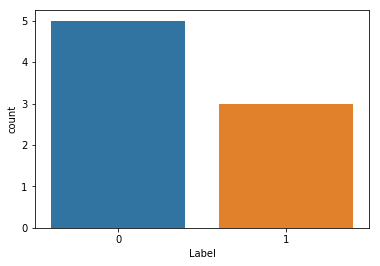

In [48]:
# Check the share of the classes
print('Share of the classes:')
print(round(df['Label'].value_counts(normalize=True)*100, 2))
countplot(x='Label', data=df)

## Split per Train/Test

In [49]:
from sklearn.model_selection import train_test_split

# Create a data with all columns except Label
df_X = df.drop('Label', axis=1)

# Create a category_desc labels dataset
df_y = pd.DataFrame(df['Label'])

# Use stratified sampling to split up the dataset according to the df_y dataset
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, stratify=df_y)

# Print out the Label counts on the training y labels
print(round(y_train['Label'].value_counts(normalize=True)*100, 2))

0    66.67
1    33.33
Name: Label, dtype: float64


In [50]:
from sklearn.linear_model import LogisticRegression

def check_score(X_, y_):
    
    # Split X and the y labels into training and test sets
    X_train_, X_test_, y_train_, y_test_ = train_test_split(X_, y_)

    lgr = LogisticRegression()
    # Fit lgr to the training data
    lgr.fit(X_train_, y_train_)

    # Score knn on the test data and print it out
    return(lgr.score(X_test_, y_test_)) 

## Missing Data

In [51]:
# Number of missing values per column
print('Number of missing values per column:')
df.isnull().sum()

Number of missing values per column:


Date      0
Brand     3
Price1    1
Price2    1
Engine    0
Color     1
Year      0
Label     0
dtype: int64

In [52]:
# Delete all rows with missing
print('Number of rows:', df.shape[0])
print('Number of rows after deleting all rows with missing:', df.dropna().shape[0])
df.dropna()

Number of rows: 8
Number of rows after deleting all rows with missing: 4


,Date,Brand,Price1,Price2,Engine,Color,Year,Label
0,10.10.2018,Honda Civic,22000.0,23000.0,150.0 horsepower,red,2000,1
2,07.11.2018,Toyota Corolla,27000.0,25000.0,250.0 horsepower,green,2015,0
5,01.01.2019,Audi A4,15000.0,11000.0,40.0 horsepower,blue,2005,0
7,07.02.2019,Honda,1500.0,1100.0,45.0 horsepower,yellow,1995,1


In [53]:
# Subset dataset without missing
df_no_missing = df[df.notnull()]
df_no_missing

,Date,Brand,Price1,Price2,Engine,Color,Year,Label
0,10.10.2018,Honda Civic,22000.0,23000.0,150.0 horsepower,red,2000,1
1,14.10.2018,NaN,25000.0,21000.0,100.0 horsepower,blue,2010,0
2,07.11.2018,Toyota Corolla,27000.0,25000.0,250.0 horsepower,green,2015,0
3,20.11.2018,Ford Focus,NaN,NaN,100.5 horsepower,red,2011,0
4,06.12.2018,NaN,35000.0,35000.0,50.0 horsepower,NaN,2019,0
5,01.01.2019,Audi A4,15000.0,11000.0,40.0 horsepower,blue,2005,0
6,07.01.2019,NaN,1000.0,1200.0,50.5 horsepower,red,1999,1
7,07.02.2019,Honda,1500.0,1100.0,45.0 horsepower,yellow,1995,1


In [54]:
# Delete all cols with missing
print('Number of crows:', df.shape[1])
print('Number of cows after deleting all cows with missing:', df.dropna(axis=1).shape[1])
df.dropna(axis=1)

Number of crows: 8
Number of cows after deleting all cows with missing: 4


,Date,Engine,Year,Label
0,10.10.2018,150.0 horsepower,2000,1
1,14.10.2018,100.0 horsepower,2010,0
2,07.11.2018,250.0 horsepower,2015,0
3,20.11.2018,100.5 horsepower,2011,0
4,06.12.2018,50.0 horsepower,2019,0
5,01.01.2019,40.0 horsepower,2005,0
6,07.01.2019,50.5 horsepower,1999,1
7,07.02.2019,45.0 horsepower,1995,1


In [55]:
# Columns with at least 5 not missing
df.dropna(axis=1, thresh=5)

,Date,Brand,Price1,Price2,Engine,Color,Year,Label
0,10.10.2018,Honda Civic,22000.0,23000.0,150.0 horsepower,red,2000,1
1,14.10.2018,NaN,25000.0,21000.0,100.0 horsepower,blue,2010,0
2,07.11.2018,Toyota Corolla,27000.0,25000.0,250.0 horsepower,green,2015,0
3,20.11.2018,Ford Focus,NaN,NaN,100.5 horsepower,red,2011,0
4,06.12.2018,NaN,35000.0,35000.0,50.0 horsepower,NaN,2019,0
5,01.01.2019,Audi A4,15000.0,11000.0,40.0 horsepower,blue,2005,0
6,07.01.2019,NaN,1000.0,1200.0,50.5 horsepower,red,1999,1
7,07.02.2019,Honda,1500.0,1100.0,45.0 horsepower,yellow,1995,1


In [56]:
# Fill in missing values
df['Brand'].fillna('missing', inplace=True)
df['Color'].fillna('missing', inplace=True)

df['Price1'].fillna(df['Price1'].mean(), inplace=True)
df['Price2'].fillna(df['Price2'].mean(), inplace=True)

df

,Date,Brand,Price1,Price2,Engine,Color,Year,Label
0,10.10.2018,Honda Civic,22000.000000,23000.000000,150.0 horsepower,red,2000,1
1,14.10.2018,missing,25000.000000,21000.000000,100.0 horsepower,blue,2010,0
2,07.11.2018,Toyota Corolla,27000.000000,25000.000000,250.0 horsepower,green,2015,0
3,20.11.2018,Ford Focus,18071.428571,16757.142857,100.5 horsepower,red,2011,0
4,06.12.2018,missing,35000.000000,35000.000000,50.0 horsepower,missing,2019,0
5,01.01.2019,Audi A4,15000.000000,11000.000000,40.0 horsepower,blue,2005,0
6,07.01.2019,missing,1000.000000,1200.000000,50.5 horsepower,red,1999,1
7,07.02.2019,Honda,1500.000000,1100.000000,45.0 horsepower,yellow,1995,1


## Data types

In [57]:
# Check Data Types
df.dtypes

Date       object
Brand      object
Price1    float64
Price2    float64
Engine     object
Color      object
Year        int64
Label       int64
dtype: object

In [58]:
# Reduce memory usage
if df['Price1'].min() > np.finfo(np.float32).min and df['Price1'].max() < np.finfo(np.float32).max:
    df['Price1'] = df['Price1'].astype(np.float32)
    
if df['Price2'].min() > np.finfo(np.float32).min and df['Price2'].max() < np.finfo(np.float32).max:
    df['Price2'] = df['Price2'].astype(np.float32)

if df['Year'].min() > np.iinfo(np.int32).min and df['Year'].max() < np.iinfo(np.int32).max:
    df['Year'] = df['Year'].astype(np.int32)

# Check Data Types
df.dtypes

Date       object
Brand      object
Price1    float32
Price2    float32
Engine     object
Color      object
Year        int32
Label       int64
dtype: object

## Standartization

### Log normalization

_Example of using: Column with hight varience_

In [59]:
df.var()

Price1    1.436020e+08
Price2    1.397196e+08
Year      7.050000e+01
Label     2.678571e-01
dtype: float64

In [60]:
df['log_Year'] = np.log(df['Year'])
df['log_Year'].var()

1.7505037342915824e-05

### Scaling data 

In [61]:
# Import StandardScaler from scikit-learn
from sklearn.preprocessing import StandardScaler

# Create the scaler
ss = StandardScaler()

# Take a subset of the DataFrame you want to scale 
df_subset = df[['Price1', 'Price2', 'Year']]

# Apply the scaler to the DataFrame subset
df_subset_scaled = ss.fit_transform(df_subset)

df_subset_scaled

array([[ 3.50469584e-01,  5.64612799e-01, -8.59419469e-01],
       [ 6.18100895e-01,  3.83729981e-01,  4.13794559e-01],
       [ 7.96521770e-01,  7.45495617e-01,  1.05040157e+00],
       [-6.53396756e-08, -2.20804221e-08,  5.41115962e-01],
       [ 1.51020527e+00,  1.64990971e+00,  1.55968718e+00],
       [-2.74003476e-01, -5.20684108e-01, -2.22812455e-01],
       [-1.52294960e+00, -1.40700992e+00, -9.86740872e-01],
       [-1.47834438e+00, -1.41605406e+00, -1.49602648e+00]])

## Feature engineering 

In [62]:
df['Price_type'] = 'low'
df.loc[(df['Price1'] > 10000), 'Price_type'] = 'higth'
df[['Price1', 'Price_type']] 

,Price1,Price_type
0,22000.000000,higth
1,25000.000000,higth
2,27000.000000,higth
3,18071.427734,higth
4,35000.000000,higth
5,15000.000000,higth
6,1000.000000,low
7,1500.000000,low


### Encoding categorical variables

#### Label Encoder

In [63]:
from sklearn.preprocessing import LabelEncoder

# Set up the LabelEncoder object
enc = LabelEncoder()

# Apply the encoding to the Color column
df['Color_enc'] = enc.fit_transform(df['Color'])

# Compare the two columns
print(df[['Color', 'Color_enc']].head())

     Color  Color_enc
0      red          3
1     blue          0
2    green          1
3      red          3
4  missing          2


#### One Hot Encoder

In [64]:
# Transform the Color column and concatinate with DataSet
df = pd.concat([df, pd.get_dummies(df['Price_type'])], axis=1)

df[['Price_type', 'higth', 'low']]

,Price_type,higth,low
0,higth,1,0
1,higth,1,0
2,higth,1,0
3,higth,1,0
4,higth,1,0
5,higth,1,0
6,low,0,1
7,low,0,1


### Engineering numerical features 

#### Average

In [65]:
# Create a list of the columns to average
price_columns = ['Price1', 'Price2']

# Use apply to create a mean column
df['Price_average'] = df.apply(lambda row: row[price_columns].mean(), axis=1)
df['Price_average_log'] = np.log(df['Price_average'])

# Take a look at the results
print(df[['Price1', 'Price2', 'Price_average', 'Price_average_log']] )

         Price1        Price2  Price_average  Price_average_log
0  22000.000000  23000.000000   22500.000000          10.021271
1  25000.000000  21000.000000   23000.000000          10.043249
2  27000.000000  25000.000000   26000.000000          10.165852
3  18071.427734  16757.142578   17414.285156           9.765046
4  35000.000000  35000.000000   35000.000000          10.463103
5  15000.000000  11000.000000   13000.000000           9.472705
6   1000.000000   1200.000000    1100.000000           7.003065
7   1500.000000   1100.000000    1300.000000           7.170120


#### Datetime

In [70]:
# First, convert string column to date column
df['Date_converted'] = pd.to_datetime(df['Date'])

# Extract just the month and year from the converted column
df['Date_month'] = df.apply(lambda row: row['Date_converted'].month, axis=1)
df['Date_year'] = df.apply(lambda row: row['Date_converted'].year, axis=1)

# Take a look at the converted and new month columns
print(df[['Date_converted', 'Date_month', 'Date_year']])

  Date_converted  Date_month  Date_year
0     2018-10-10          10       2018
1     2018-10-14          10       2018
2     2018-07-11           7       2018
3     2018-11-20          11       2018
4     2018-06-12           6       2018
5     2019-01-01           1       2019
6     2019-07-01           7       2019
7     2019-07-02           7       2019


#### Text classification

In [71]:
import re

# Write a pattern to extract numbers and decimals
def return_hp(str):
    pattern = re.compile(r'\d+\.\d+')
    
    # Search the text for matches
    hp = re.match(pattern, str)
    
    # If a value is returned, use group(0) to return the found value
    if hp is not None:
        return float(hp.group(0))
        
# Apply the function to the Length column and take a look at both columns
df['Engine_hp'] = df['Engine'].apply(lambda row: return_hp(row))
df[['Engine', 'Engine_hp']]

,Engine,Engine_hp
0,150.0 horsepower,150.0
1,100.0 horsepower,100.0
2,250.0 horsepower,250.0
3,100.5 horsepower,100.5
4,50.0 horsepower,50.0
5,40.0 horsepower,40.0
6,50.5 horsepower,50.5
7,45.0 horsepower,45.0


In [72]:
# transformation into a text vector
from sklearn.feature_extraction.text import TfidfVectorizer

# Create the vectorizer method
tfidf_vec = TfidfVectorizer()

# Transform the text into tf-idf vectors
df['Brand_text_tfidf'] = tfidf_vec.fit_transform(df['Brand'])

df[['Brand', 'Brand_text_tfidf']]

,Brand,Brand_text_tfidf
0,Honda Civic,"(0, 6)\t0.6423280258820045\n (0, 2)\t0.7664..."
1,missing,"(0, 6)\t0.6423280258820045\n (0, 2)\t0.7664..."
2,Toyota Corolla,"(0, 6)\t0.6423280258820045\n (0, 2)\t0.7664..."
3,Ford Focus,"(0, 6)\t0.6423280258820045\n (0, 2)\t0.7664..."
4,missing,"(0, 6)\t0.6423280258820045\n (0, 2)\t0.7664..."
5,Audi A4,"(0, 6)\t0.6423280258820045\n (0, 2)\t0.7664..."
6,missing,"(0, 6)\t0.6423280258820045\n (0, 2)\t0.7664..."
7,Honda,"(0, 6)\t0.6423280258820045\n (0, 2)\t0.7664..."


## Removing redundant features
__remove noisy/correlated/duplicated features__

### Redundant columns

In [73]:
# Create a list of redundant column names to drop
to_drop = ['Brand', 'Price1', 'Price2', 'Price_type', 'higth', 'Price_average', 'Engine', 'Color', 'Year', 'Date', 'Date_converted']

# Drop those columns from the dataset
df_subset_1 = df.drop(to_drop, axis=1)

# Print out the head of the new dataset
df_subset_1

,Label,log_Year,Color_enc,low,Price_average_log,Date_month,Date_year,Engine_hp,Brand_text_tfidf
0,1,7.600902,3,0,10.021271,10,2018,150.0,"(0, 6)\t0.6423280258820045\n (0, 2)\t0.7664..."
1,0,7.605890,0,0,10.043249,10,2018,100.0,"(0, 6)\t0.6423280258820045\n (0, 2)\t0.7664..."
2,0,7.608374,1,0,10.165852,7,2018,250.0,"(0, 6)\t0.6423280258820045\n (0, 2)\t0.7664..."
3,0,7.606387,3,0,9.765046,11,2018,100.5,"(0, 6)\t0.6423280258820045\n (0, 2)\t0.7664..."
4,0,7.610358,2,0,10.463103,6,2018,50.0,"(0, 6)\t0.6423280258820045\n (0, 2)\t0.7664..."
5,0,7.603399,0,0,9.472705,1,2019,40.0,"(0, 6)\t0.6423280258820045\n (0, 2)\t0.7664..."
6,1,7.600402,3,1,7.003065,7,2019,50.5,"(0, 6)\t0.6423280258820045\n (0, 2)\t0.7664..."
7,1,7.598399,4,1,7.170120,7,2019,45.0,"(0, 6)\t0.6423280258820045\n (0, 2)\t0.7664..."


### Correlated columns

In [74]:
# Print out the column correlations of the dataset
df_subset_1.corr()

,Label,log_Year,Color_enc,low,Price_average_log,Date_month,Date_year,Engine_hp
Label,1.000000,-0.863475,0.730297,0.745356,-0.721943,0.163810,0.466667,-0.188129
log_Year,-0.863475,1.000000,-0.507299,-0.717437,0.785789,0.025731,-0.698747,0.335709
Color_enc,0.730297,-0.507299,1.000000,0.612372,-0.554695,0.388797,0.182574,-0.181763
low,0.745356,-0.717437,0.612372,1.000000,-0.977408,-0.073258,0.745356,-0.431346
Price_average_log,-0.721943,0.785789,-0.554695,-0.977408,1.000000,0.137032,-0.832114,0.471780
Date_month,0.163810,0.025731,0.388797,-0.073258,0.137032,1.000000,-0.622477,0.354947
Date_year,0.466667,-0.698747,0.182574,0.745356,-0.832114,-0.622477,1.000000,-0.608316
Engine_hp,-0.188129,0.335709,-0.181763,-0.431346,0.471780,0.354947,-0.608316,1.000000


In [75]:
# Take a minute to find the column where the correlation value is greater than 0.75 at least twice
to_drop = ['log_Year', 'Price_average_log']

# Drop that column from the DataFrame
df_subset_2 = df_subset_1.drop(to_drop, axis=1)

# Print out the column correlations of the current dataset
df_subset_2.corr()

,Label,Color_enc,low,Date_month,Date_year,Engine_hp
Label,1.000000,0.730297,0.745356,0.163810,0.466667,-0.188129
Color_enc,0.730297,1.000000,0.612372,0.388797,0.182574,-0.181763
low,0.745356,0.612372,1.000000,-0.073258,0.745356,-0.431346
Date_month,0.163810,0.388797,-0.073258,1.000000,-0.622477,0.354947
Date_year,0.466667,0.182574,0.745356,-0.622477,1.000000,-0.608316
Engine_hp,-0.188129,-0.181763,-0.431346,0.354947,-0.608316,1.000000


In [76]:
df_subset_2

,Label,Color_enc,low,Date_month,Date_year,Engine_hp,Brand_text_tfidf
0,1,3,0,10,2018,150.0,"(0, 6)\t0.6423280258820045\n (0, 2)\t0.7664..."
1,0,0,0,10,2018,100.0,"(0, 6)\t0.6423280258820045\n (0, 2)\t0.7664..."
2,0,1,0,7,2018,250.0,"(0, 6)\t0.6423280258820045\n (0, 2)\t0.7664..."
3,0,3,0,11,2018,100.5,"(0, 6)\t0.6423280258820045\n (0, 2)\t0.7664..."
4,0,2,0,6,2018,50.0,"(0, 6)\t0.6423280258820045\n (0, 2)\t0.7664..."
5,0,0,0,1,2019,40.0,"(0, 6)\t0.6423280258820045\n (0, 2)\t0.7664..."
6,1,3,1,7,2019,50.5,"(0, 6)\t0.6423280258820045\n (0, 2)\t0.7664..."
7,1,4,1,7,2019,45.0,"(0, 6)\t0.6423280258820045\n (0, 2)\t0.7664..."


In [77]:
# Score on the test data and print it out
df_X = df_subset_2.drop(['Label', 'Brand_text_tfidf'], axis=1)
check_score(df_X, df_subset_2['Label'])

0.5

## Dimensionality reduction

In [78]:
from sklearn.decomposition import PCA

# Set up PCA and the X vector for diminsionality reduction
pca = PCA()
df_X = df_subset_2.drop(['Label', 'Brand_text_tfidf'], axis=1)

# Apply PCA to the dataset X vector
transformed_X = pca.fit_transform(df_X)

# Look at the percentage of variance explained by the different components
print(pca.explained_variance_ratio_)

[9.97845778e-01 1.80026349e-03 3.19924268e-04 3.09839786e-05
 3.05041027e-06]


In [79]:
# Score on the test data and print it out
check_score(transformed_X, df['Label'])

1.0